##  K Means Clustering Algorithm Implementation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
#make blobs is a function that generates random data points for clustering 
import pandas as pd
%matplotlib inline 

In [5]:
X,y = make_blobs(n_samples=1000, centers=3, random_state=23,n_features=2)

In [6]:
X.shape

(1000, 2)

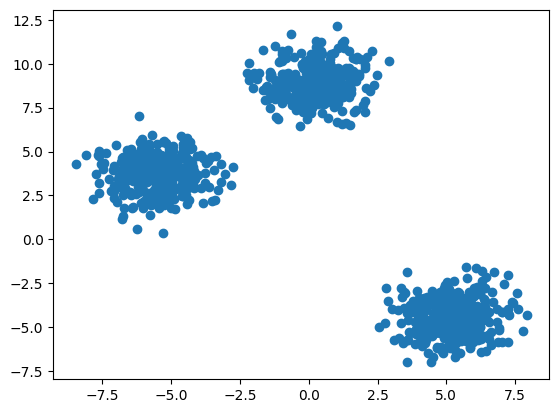

In [9]:
plt.scatter(X[:,0],X[:,1])

#here [:,0] means all the rows of the first column
#here [:,1] means all the rows of the second column
#c=y means color of the points will be decided by the y values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
#random state is used to get the same random values everytime means it will not change the random values, it will be fixed.setting it 42 means it will give the same random values everytime

In [11]:
X_train.shape

(670, 2)

In [12]:
X_test.shape

(330, 2)

In [14]:
from sklearn.cluster import KMeans


In [15]:
##Manual Process to find the best K value 
## elbow method to find the best K value

wcss = [] #within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_) #inertia_ is the formula to calculate the wcss. Formula is sum of squared distances of samples to their closest cluster center.
    

In [17]:
print(wcss)

[34827.57682552022, 7935.437286145416, 1319.2730531585607, 1140.4677884655127, 992.6326991429297, 858.0221237958043, 772.0075259200174, 663.0436703514847, 645.4075999942629, 531.3153436705672]


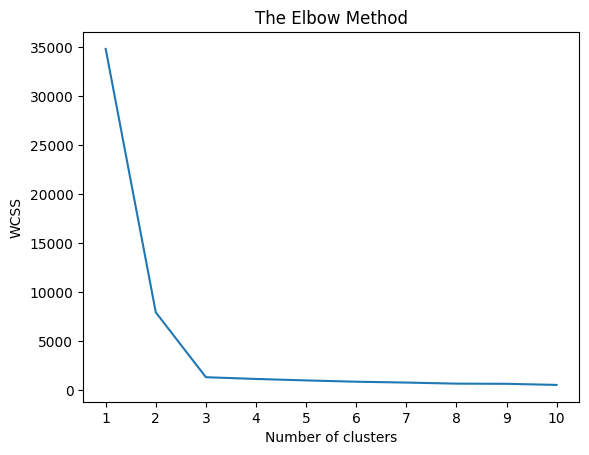

In [49]:
##Plotting the elbow method
plt.plot(range(1,11),wcss) #range(1,11) means 1 to 10 ,wcss is the y axis
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [29]:
## k = 3 is the best value for K as the elbow is at 3
kmeans = KMeans(n_clusters = 3, init = "k-means++")

In [30]:
y_label = kmeans.fit_predict(X_train) 

#fitting and predicting the model,here we are predicting the labels
#labels are the cluster numbers assigned to each data point by the kmeans algorithm

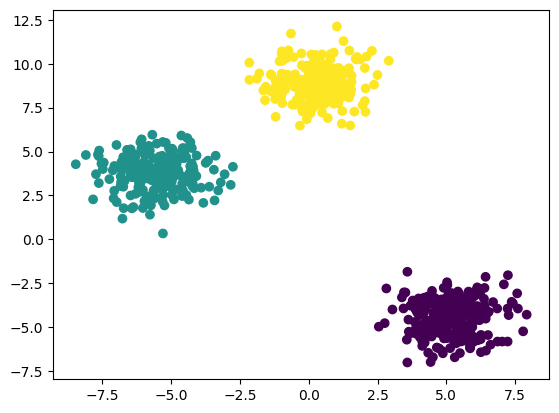

In [31]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

In [32]:
y_test_label = kmeans.predict(X_test) 
#predicting the test data
#test data is not used to train the model, it is used to test the model.

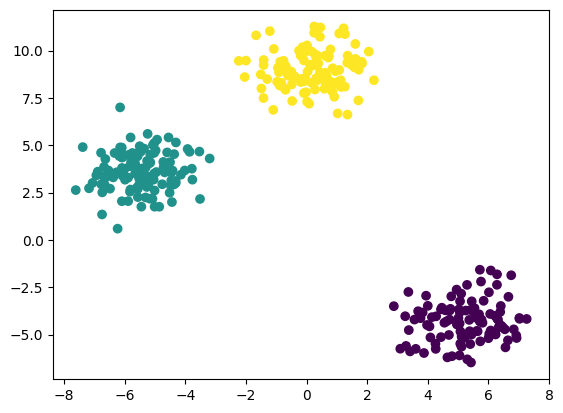

In [33]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label) #c=y_test_label means color of the points will be decided by the y_test_label values

In [34]:
## Centroids of the clusters
kmeans.cluster_centers_

array([[ 5.19869533, -4.43633479],
       [-5.57129803,  3.78294776],
       [ 0.25819212,  8.89996663]])

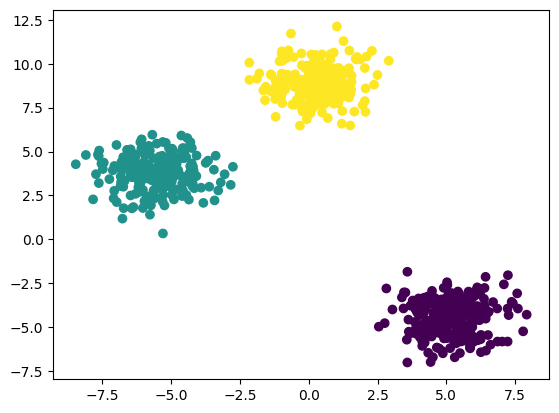

In [35]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

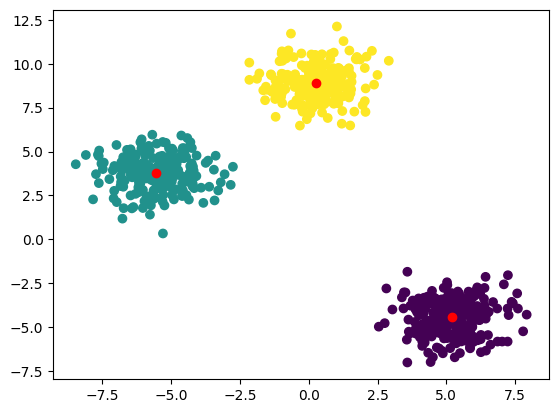

In [36]:
## Plotting the centroids
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red') 
#kmeans.cluster_centers_[:,0] means all the rows of the first column of the cluster centers
#we choose first column as x and second column as y because we have 2 features
#c='red' means color of the points will be red


## Now doing it automatically using the KMeans algorithm

In [38]:
!pip install kneed


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from kneed import KneeLocator

In [40]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing') 
kl.elbow

#curve='convex' means the curve is convex, direction='decreasing' means the curve is decreasing
#curve = concave means the curve is concave and then direction = increasing means the curve is increasing

3

In [41]:
## for perfromance evaluation we can use silhouette score

from sklearn.metrics import silhouette_score

In [43]:
#silhouette score ranges from -1 to 1

silhouette_coef = []
for k in range(2,11): #not taking 1 because silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters = k, init= 'k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_) #kmeans.labels_ are the labels assigned to each data point by the kmeans algorithm
    silhouette_coef.append(score)

In [44]:
silhouette_coef

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.6560885493978118,
 0.33367872107343594,
 0.3159312106873299,
 0.33581788048273503,
 0.32530358108427315,
 0.3268934385355685]

In [45]:
silhouette_score(X_train,kmeans.labels_)

0.3268934385355685

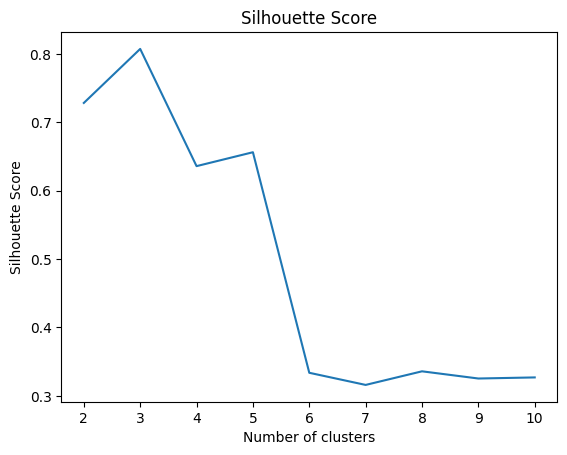

In [48]:
## Plotting the silhouette score

plt.plot(range(2,11),silhouette_coef)
plt.xticks(range(2,11))
plt.title('Silhouette Score')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

### Silhouette score is maximum for k = 3 at 80%